In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from statistics import median

In [7]:
# Count Security issue & Pull request for each Reporitng mechanism
with open('dataset/AllPackages.json', 'r') as file:
    data = json.load(file)

reporting_data = []
for entry in data:
    reporting_mechanism = entry.get("SecurityPolicy_reporting_mechanism", "Unknown")
    
    # Skip specific reporting mechanisms
    # if reporting_mechanism in ['issue', 'email_issue', 'not_mentioned']:
    #     continue

    for issue in entry.get("security_issues_created_after_policy", []):
        issue_type = "Pull Request" if "/pull/" in issue.get("url", "") else "Issue"
        reporting_data.append({
            "Reporting Mechanism": reporting_mechanism,
            "Type": issue_type
        })

df = pd.DataFrame(reporting_data)

# Calculate and print the total number of issues and pull requests
total_issue = df[df["Type"] == "Issue"].shape[0]
total_pulls = df[df["Type"] == "Pull Request"].shape[0]


count_df = df.groupby(["Reporting Mechanism", "Type"]).size().unstack(fill_value=0)
count_df["Issue %"] = (count_df.get("Issue", 0) / total_issue) * 100
display(count_df)


print("Total Issues Created After Policy:", total_issue)
print("Total Pull Requests Created After Policy:", total_pulls)


Type,Issue,Pull Request,Issue %
Reporting Mechanism,,,
advisory,166,37,20.906801
advisory_external,1,0,0.125945
email,311,335,39.168766
email_advisory,6,19,0.755668
email_external,76,46,9.571788
email_issue,6,2,0.755668
external,214,1516,26.952141
not_mentioned,14,2,1.763224


Total Issues Created After Policy: 794
Total Pull Requests Created After Policy: 1957



Number of Issues by Reporting Mechanism:
- advisory: 166 issues (21.45%)
- advisory_external: 1 issues (0.13%)
- email: 311 issues (40.18%)
- email_advisory: 6 issues (0.78%)
- email_external: 76 issues (9.82%)
- external: 214 issues (27.65%)

Number of Packages with at least one Issue by Reporting Mechanism:
- advisory: 12 packages (21.82%)
- advisory_external: 1 packages (1.82%)
- email: 23 packages (41.82%)
- email_advisory: 2 packages (3.64%)
- email_external: 7 packages (12.73%)
- external: 10 packages (18.18%)

Median number of issues per project: 7.0


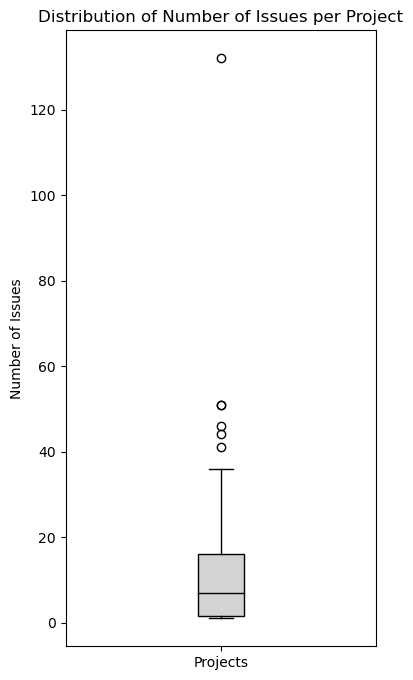

In [8]:
# Number of Issues and Projects by Reporting Mechanism
with open('dataset/AllPackages.json', 'r') as file:
    data = json.load(file)

reporting_data = []
for entry in data:
    reporting_mechanism = entry.get("SecurityPolicy_reporting_mechanism", "Unknown")
    package_name = entry.get("project_name", "Unknown") 
    for issue in entry.get("security_issues_created_after_policy", []):
        issue_type = "Pull Request" if "/pull/" in issue.get("url", "") else "Issue"
        reporting_data.append({
            "Package": package_name,
            "Reporting Mechanism": reporting_mechanism,
            "Type": issue_type
        })

df = pd.DataFrame(reporting_data)

# Filter out unwanted reporting mechanisms
df = df[~df["Reporting Mechanism"].isin(["email_issue", "not_mentioned"])]

issue_df = df[df["Type"] == "Issue"]

# Number of Issues by Reporting Mechanism
count_df = issue_df.groupby(["Reporting Mechanism"]).size()

total_issues = count_df.sum()

print("\nNumber of Issues by Reporting Mechanism:")
for mech, count in count_df.items():
    percent = (count / total_issues) * 100
    print(f"- {mech}: {count} issues ({percent:.2f}%)")

# Number of unique Packages with at least one Issue
package_issue_count = issue_df.groupby("Reporting Mechanism")["Package"].nunique()
total_packages = package_issue_count.sum()

print("\nNumber of Packages with at least one Issue by Reporting Mechanism:")
for mech, count in package_issue_count.items():
    percent = (count / total_packages) * 100
    print(f"- {mech}: {count} packages ({percent:.2f}%)")

# Count number of issues per package
issues_per_package = issue_df.groupby("Package").size()

# Calculate median
median_issues = issues_per_package.median()
print(f"\nMedian number of issues per project: {median_issues}")

# Create the boxplot
plt.figure(figsize=(4, 8))
box = plt.boxplot(issues_per_package, vert=True, patch_artist=True)

for patch in box['boxes']:
    patch.set_facecolor('lightgray')

for median in box['medians']:
    median.set_color('black')

plt.title('Distribution of Number of Issues per Project')
plt.ylabel('Number of Issues')
plt.xticks([1], ['Projects'])
plt.grid(False)
plt.show()


In [9]:
# Number of Issues associated with author association
with open('dataset/AllPackages.json', 'r') as file:
    data = json.load(file)

# Filter and collect author association data
association_data = []
for entry in data:
    reporting_mechanism = entry.get("SecurityPolicy_reporting_mechanism", "Unknown")
    if reporting_mechanism in ['email_issue', 'not_mentioned', 'issue']:
        continue

    for issue in entry.get("security_issues_created_after_policy", []):
        if "/pull/" in issue.get("url", ""):
            continue  # <-- Skip Pull Requests
        
        author_association = issue.get("issue_author_association", "Unknown")
        association_data.append({
            "Author Association": author_association
        })

# Create DataFrame
association_df = pd.DataFrame(association_data)
# display(association_df)

# Group and aggregate
association_counts = association_df["Author Association"].value_counts()
total_issues = association_df.shape[0]

# Plotting
# fig, ax = plt.subplots(figsize=(10, 6))
# bars = association_counts.plot(kind="bar", ax=ax, color="gray")

# ax.set_xlabel("Author Association", fontsize=16)
# ax.set_ylabel("# Issues", fontsize=16)
# ax.set_title("Issue Submitter's Association to the Project (Issues Only)", fontsize=18)
# plt.xticks(rotation=45, ha="right", fontsize=14)
# plt.yticks(fontsize=14)

# Add value and percentage labels
# for container in ax.containers:
#     ax.bar_label(
#         container,
#         labels=[f"{int(height)}\n({height/total_issues:.2%})" if height > 0 else "" for height in container.datavalues],
#         padding=5,
#         fontsize=12
#     )

# ax.grid(False)
# ax.axhline(0, color="black", linewidth=0.8)
# plt.tight_layout()
# plt.show()


print(f"Total Issues: {total_issues}")
print("\nNumber and Percentage of Issues by Author Association:")
for association, count in association_counts.items():
    percentage = (count / total_issues) * 100 if total_issues != 0 else 0
    print(f"- {association}: {int(count)} ({percentage:.2f}%)")


Total Issues: 774

Number and Percentage of Issues by Author Association:
- NONE: 351 (45.35%)
- MEMBER: 188 (24.29%)
- CONTRIBUTOR: 182 (23.51%)
- COLLABORATOR: 53 (6.85%)
